# import

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
import datetime
import math
from sklearn.ensemble import RandomForestClassifier

In [3]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

In [4]:
# 출력 컬럼 40개
pd.set_option('display.max_columns', 40)

# 모듈

In [5]:
# , 제거
def delcom(x):
    result = x.replace(',','')
    return result

# data

In [6]:
product=pd.read_csv('01_Pruduct.csv')
print(product.shape)
product.info()

C:\Users\meuch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5024906, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [7]:
search1=pd.read_csv('02_Search1.csv')
print(search1.shape)
search1.info()

(2884943, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
CLNT_ID       int64
SESS_ID       int64
KWD_NM        object
SEARCH_CNT    int64
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [8]:
search2=pd.read_csv('03_Search2.csv',parse_dates=["SESS_DT"])
print(search2.shape)
search2.info()

(8051172, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051172 entries, 0 to 8051171
Data columns (total 3 columns):
SESS_DT       datetime64[ns]
KWD_NM        object
SEARCH_CNT    object
dtypes: datetime64[ns](1), object(2)
memory usage: 184.3+ MB


In [9]:
custom=pd.read_csv('04_Custom.csv')
print(custom.shape)
custom.info()

(671679, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671679 entries, 0 to 671678
Data columns (total 3 columns):
CLNT_ID        671679 non-null int64
CLNT_GENDER    671679 non-null object
CLNT_AGE       671679 non-null int64
dtypes: int64(2), object(1)
memory usage: 15.4+ MB


In [10]:
session=pd.read_csv('05_Session.csv',parse_dates=['SESS_DT'])
print(session.shape)
session.info()

(2712907, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            int64
SESS_ID            int64
SESS_SEQ           int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 186.3+ MB


In [11]:
master=pd.read_csv('06_Master.csv')
print(master.shape)
master.info()

(847652, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
PD_C        847652 non-null int64
PD_NM       847652 non-null object
CLAC1_NM    847652 non-null object
CLAC2_NM    847652 non-null object
CLAC3_NM    847652 non-null object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


# 결측치

In [12]:
product.isnull().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [13]:
search1.isnull().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [14]:
search2.isnull().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [15]:
custom.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [16]:
session.isnull().sum()  #결측치 발견

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

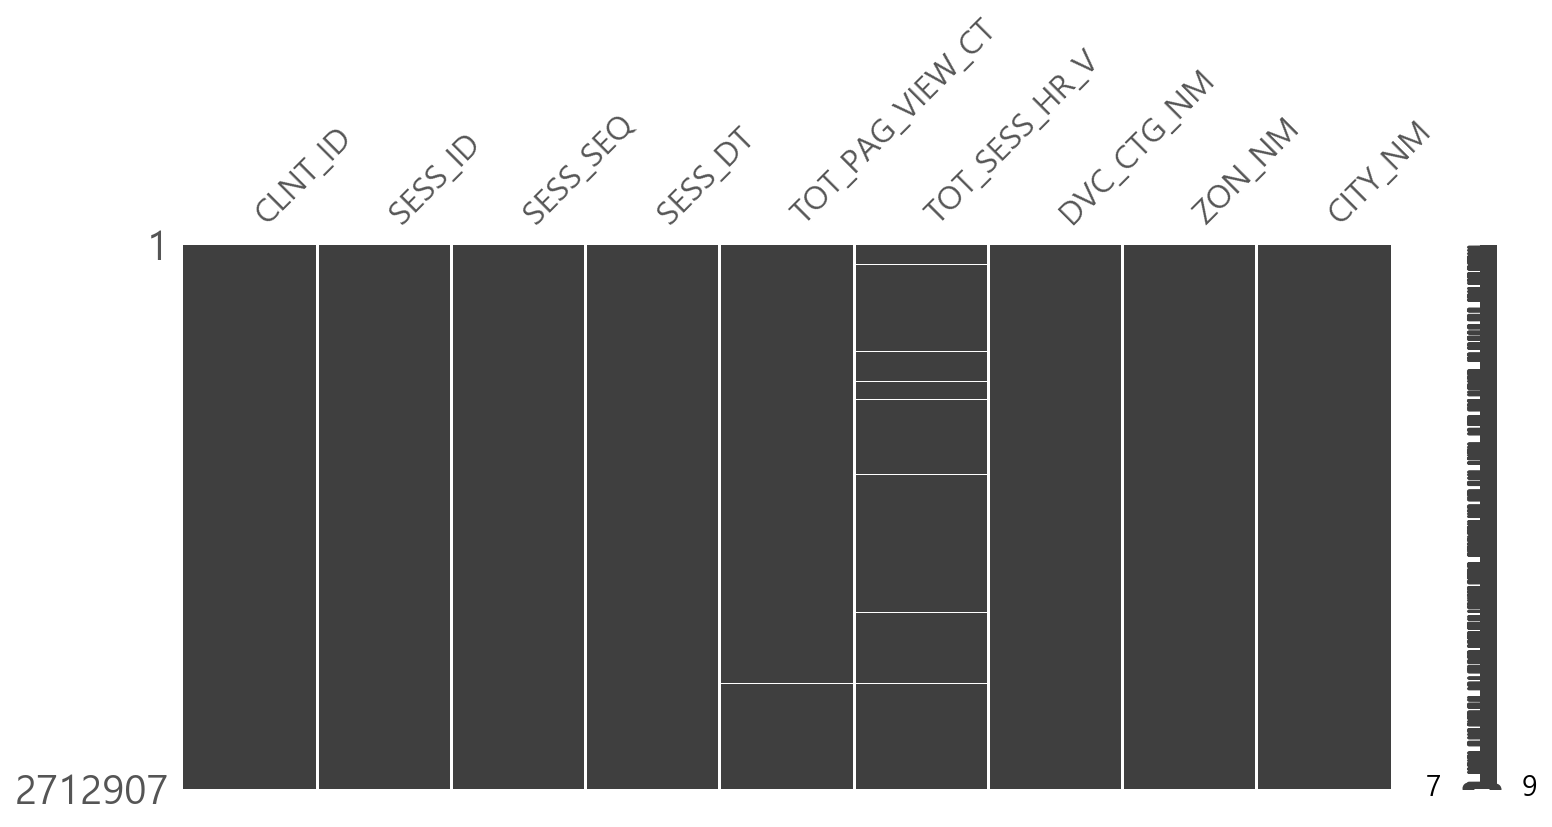

In [17]:
import missingno as msno
# conda install -c conda-forge/label/cf201901 missingno
msno.matrix(session, figsize=(12,5))

In [18]:
master.isnull().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

# Ⅰ. product 

## product 칼럼 전처리

In [19]:
product.head(10)
# PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경
# 총 판매량 추가
# PD_BRA_NM에 [] 가 있는 자료가 있고 없는 자료가 있음 [] 제거

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5
5,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,"39,000",1
6,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,[디스커버리],"39,000",1
7,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,"39,000",1
8,4148129,3942102,2,755148,모델명:올나이터 / 1개,어반디케이,"39,000",1
9,4148527,5718021,19,608620,사이즈:7 / 1개,나이키,"39,000",1


### Ⅰ- 1. PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경

In [20]:
# CT가 형태가 혼합이 되어있다. STR로 변환 후 컴마 제거 후 INT로 변경
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('str')

In [21]:
product['PD_BUY_AM']=product['PD_BUY_AM'].apply(delcom)
product['PD_BUY_CT']=product['PD_BUY_CT'].apply(delcom)

In [22]:
product['PD_BUY_AM']=product['PD_BUY_AM'].astype('int')
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('int')


### Ⅰ- 2. PD_BRA_NM에 [ ]제거 

In [23]:
## 값이 각각 있다는 것을 알 수 있음  -> ex)'아베다'로 통일
print('아베다 = ',sum(product['PD_BRA_NM']=='아베다'))

print('[아베다] = ',sum(product['PD_BRA_NM']=='[아베다]'))


아베다 =  5719
[아베다] =  1285


In [24]:
product['PD_BRA_NM']=product['PD_BRA_NM'].apply(lambda x : x.translate({ord('['):'',
                                                   ord(']'):''}))
print(sum(product['PD_BRA_NM']=='아베다'))

7004


In [25]:
product

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,6158159,85,179538,(not set),아베다,39000,1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,6406509,78,190306,5개,데코르테,39000,5
...,...,...,...,...,...,...,...,...
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),39000,1
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,39000,1
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,39000,1
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,39000,1


# Ⅱ. search1

## Ⅱ-1.

In [28]:
# 검색한 상품이 어떤 상품군(cat)에 속하는지 파악해야할 필요가 있다
# 그래야 CLNT_ID 별 검색 후 구매 성공까지 연결 지을 수 있다.
# 그러기 위해서는 product에서 상품명을 추출 한 후 search1에 cat1,2,3 를 추가해주는게 가장 베스트
# 브랜드 검색 , 상품검색, 오타 포함(데상트->대상트) 등의 문제로 보류

In [29]:
search1  # 클라이언트 id별

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1
...,...,...,...,...
2884938,6391796,1822515,일자핏,1
2884939,6391796,1822515,화이트티셔츠,1
2884940,6391796,764020,양말,6
2884941,6391796,1822515,어항,2


In [30]:
search1.pivot_table(index = 'CLNT_ID',
                   values='SEARCH_CNT',
                   aggfunc='sum')

,SEARCH_CNT
CLNT_ID,
14,5
25,21
33,22
56,5
58,18
...,...
6592524,14
6592536,4
6592537,15


# Ⅲ. search2

In [31]:
search2  # 날짜별

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
0,2018-04-07,닥스원피스,8,2018,4,7
1,2018-04-07,닥터지 브라이트닝,1,2018,4,7
2,2018-04-07,달팡 인트랄,2,2018,4,7
3,2018-04-07,대상트,1,2018,4,7
4,2018-04-07,더블유닷,6,2018,4,7
...,...,...,...,...,...,...
8051167,2018-09-12,stl수영복,3,2018,9,12
8051168,2018-09-12,supreme,2,2018,9,12
8051169,2018-09-12,tsdjpi82010,17,2018,9,12
8051170,2018-09-12,zen정장,12,2018,9,12


- 월별 날짜별 시간별 검색량 추세 파악

In [32]:
search2[search2['KWD_NM']=='데상트']    # 데상트도 있고 대상트(오타)도 있고..

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
49593,2018-04-28,데상트,375,2018,4,28
117413,2018-04-22,데상트,571,2018,4,22
181267,2018-06-24,데상트,259,2018,6,24
190796,2018-04-01,데상트,469,2018,4,1
218356,2018-07-07,데상트,252,2018,7,7
...,...,...,...,...,...,...
7811828,2018-05-12,데상트,281,2018,5,12
7843092,2018-07-25,데상트,283,2018,7,25
7892543,2018-05-15,데상트,257,2018,5,15
7909172,2018-08-06,데상트,288,2018,8,6


In [33]:
search2[search2['KWD_NM']=='대상트']

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
3,2018-04-07,대상트,1,2018,4,7
15258,2018-07-22,대상트,1,2018,7,22
50374,2018-04-22,대상트,3,2018,4,22
62895,2018-04-21,대상트,4,2018,4,21
104961,2018-04-17,대상트,1,2018,4,17
...,...,...,...,...,...,...
7587984,2018-09-20,대상트,2,2018,9,20
7680406,2018-05-23,대상트,1,2018,5,23
7841234,2018-08-26,대상트,3,2018,8,26
7952596,2018-09-29,대상트,3,2018,9,29


# Ⅳ. custom

In [34]:
custom

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30
...,...,...,...
671674,3725302,F,40
671675,3725462,M,40
671676,3725818,F,30
671677,3661812,F,30


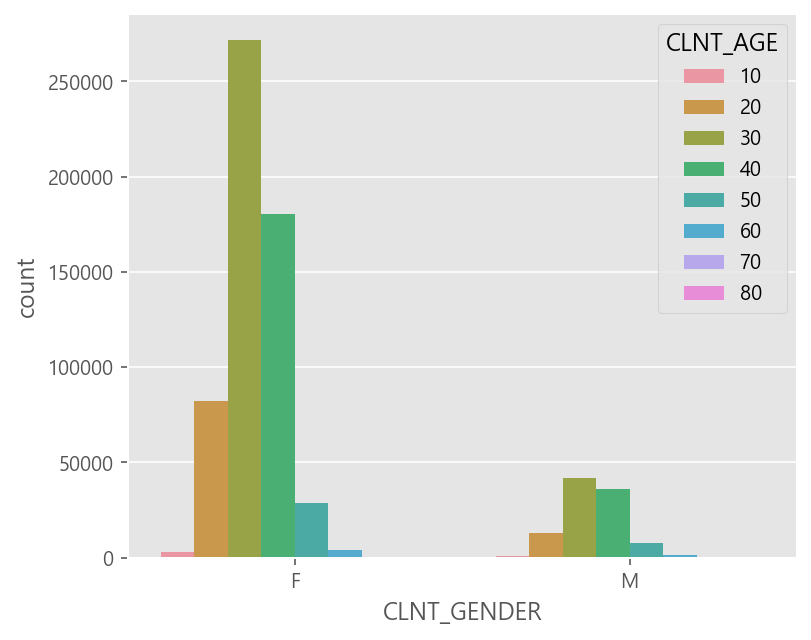

In [35]:
plt.figure(figsize=[6,5])

sns.countplot(data=custom,x='CLNT_GENDER',hue='CLNT_AGE')

# Ⅴ. session

In [36]:
session

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,year,month,day
0,5873599,8641867,9,2018-05-09,82.0,"1,890",mobile,Daejeon,Daejeon,2018,5,9
1,5873599,6616320,21,2018-06-11,105.0,"1,604",mobile,Busan,Busan,2018,6,11
2,5873599,5886172,40,2018-06-24,41.0,632,mobile,Daejeon,Daejeon,2018,6,24
3,5873884,1050889,15,2018-09-13,160.0,"1,035",mobile,Gyeonggi-do,Anyang,2018,9,13
4,5874461,10298270,5,2018-04-12,13.0,298,mobile,Seoul,Seoul,2018,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2712902,3500464,8713975,308,2018-05-08,71.0,423,mobile,Seoul,Seoul,2018,5,8
2712903,3501155,4636571,86,2018-07-14,44.0,"2,090",desktop,Seoul,Seoul,2018,7,14
2712904,3501397,582632,128,2018-09-20,164.0,"2,435",mobile,Seoul,Seoul,2018,9,20
2712905,3573271,2328407,9,2018-08-22,5.0,986,desktop,Busan,Busan,2018,8,22


- 컴마 지워주고 float형으로 바꾸기

In [16]:
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype(str)
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].apply(delcom)
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype(float)

# Ⅵ. master

In [54]:
master

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠
...,...,...,...,...,...
847647,400721,[피핀] 클레르 박스 롱티셔츠 103764 - ivory / FREE ◈85564075◈,여성의류,여성의류상의,여성티셔츠/탑
847648,400382,[바니플랫]여성플랫/BNF63011EN - 브라운 / 245 ◈83660832◈,패션잡화,여성화,여성플랫
847649,400197,섀르반 올인원 수영복 (K14D5DM231) - BL/110,시즌스포츠,수영/물놀이,아동수영복
847650,399225,링클플리츠주름밴딩스커트(CFHM1SK8821) - 블랙 / FREE,여성의류,여성의류하의,여성스커트


In [55]:
len(master['CLAC1_NM'].unique())

37

# --------------------------------------EDA--------------------------------------

# Ⅰ. 병합

In [17]:
#p roduct + session
prod_sess=pd.merge(product,session,on=['CLNT_ID','SESS_ID'])

In [18]:
# product + session + master
psm=pd.merge(prod_sess,master,on='PD_C')
del prod_sess

In [19]:
pscm=pd.merge(psm,custom,on='CLNT_ID',how='left')
del psm

# Ⅱ. 전처리

## 1-1. 변수선택 / 추가

In [20]:
pscm=pscm.drop(['CLAC2_NM','CLAC3_NM'],axis=1)

In [21]:
# 시간에 따라 변화하는그래프를 그리기 위해서 COUNT_DAY를 추가해준다.
pscm['COUNT_DAY']=pscm['SESS_DT'].apply(lambda x: x.toordinal())

In [22]:
# 년월일 추가
pscm['year']=pscm['SESS_DT'].dt.year
pscm['month']=pscm['SESS_DT'].dt.month
pscm['day']=pscm['SESS_DT'].dt.day

In [23]:
pscm['PD_BUY_TOTAL']=pscm['PD_BUY_AM']*pscm['PD_BUY_CT']

## 1-2 상관관계

In [55]:
pscm.dtypes

CLNT_ID                     int64
SESS_ID                     int64
HITS_SEQ                    int64
PD_C                        int64
PD_ADD_NM                  object
PD_BRA_NM                  object
PD_BUY_AM                   int32
PD_BUY_CT                   int32
SESS_SEQ                    int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT           float64
TOT_SESS_HR_V             float64
DVC_CTG_NM                 object
ZON_NM                     object
CITY_NM                    object
PD_NM                      object
CLAC1_NM                   object
CLNT_GENDER                object
CLNT_AGE                  float64
COUNT_DAY                   int64
year                        int64
month                       int64
day                         int64
PD_BUY_TOTAL                int32
dtype: object

In [24]:
corr_col=pscm[['HITS_SEQ','SESS_SEQ','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','CLNT_AGE']]
corrMat = corr_col.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False

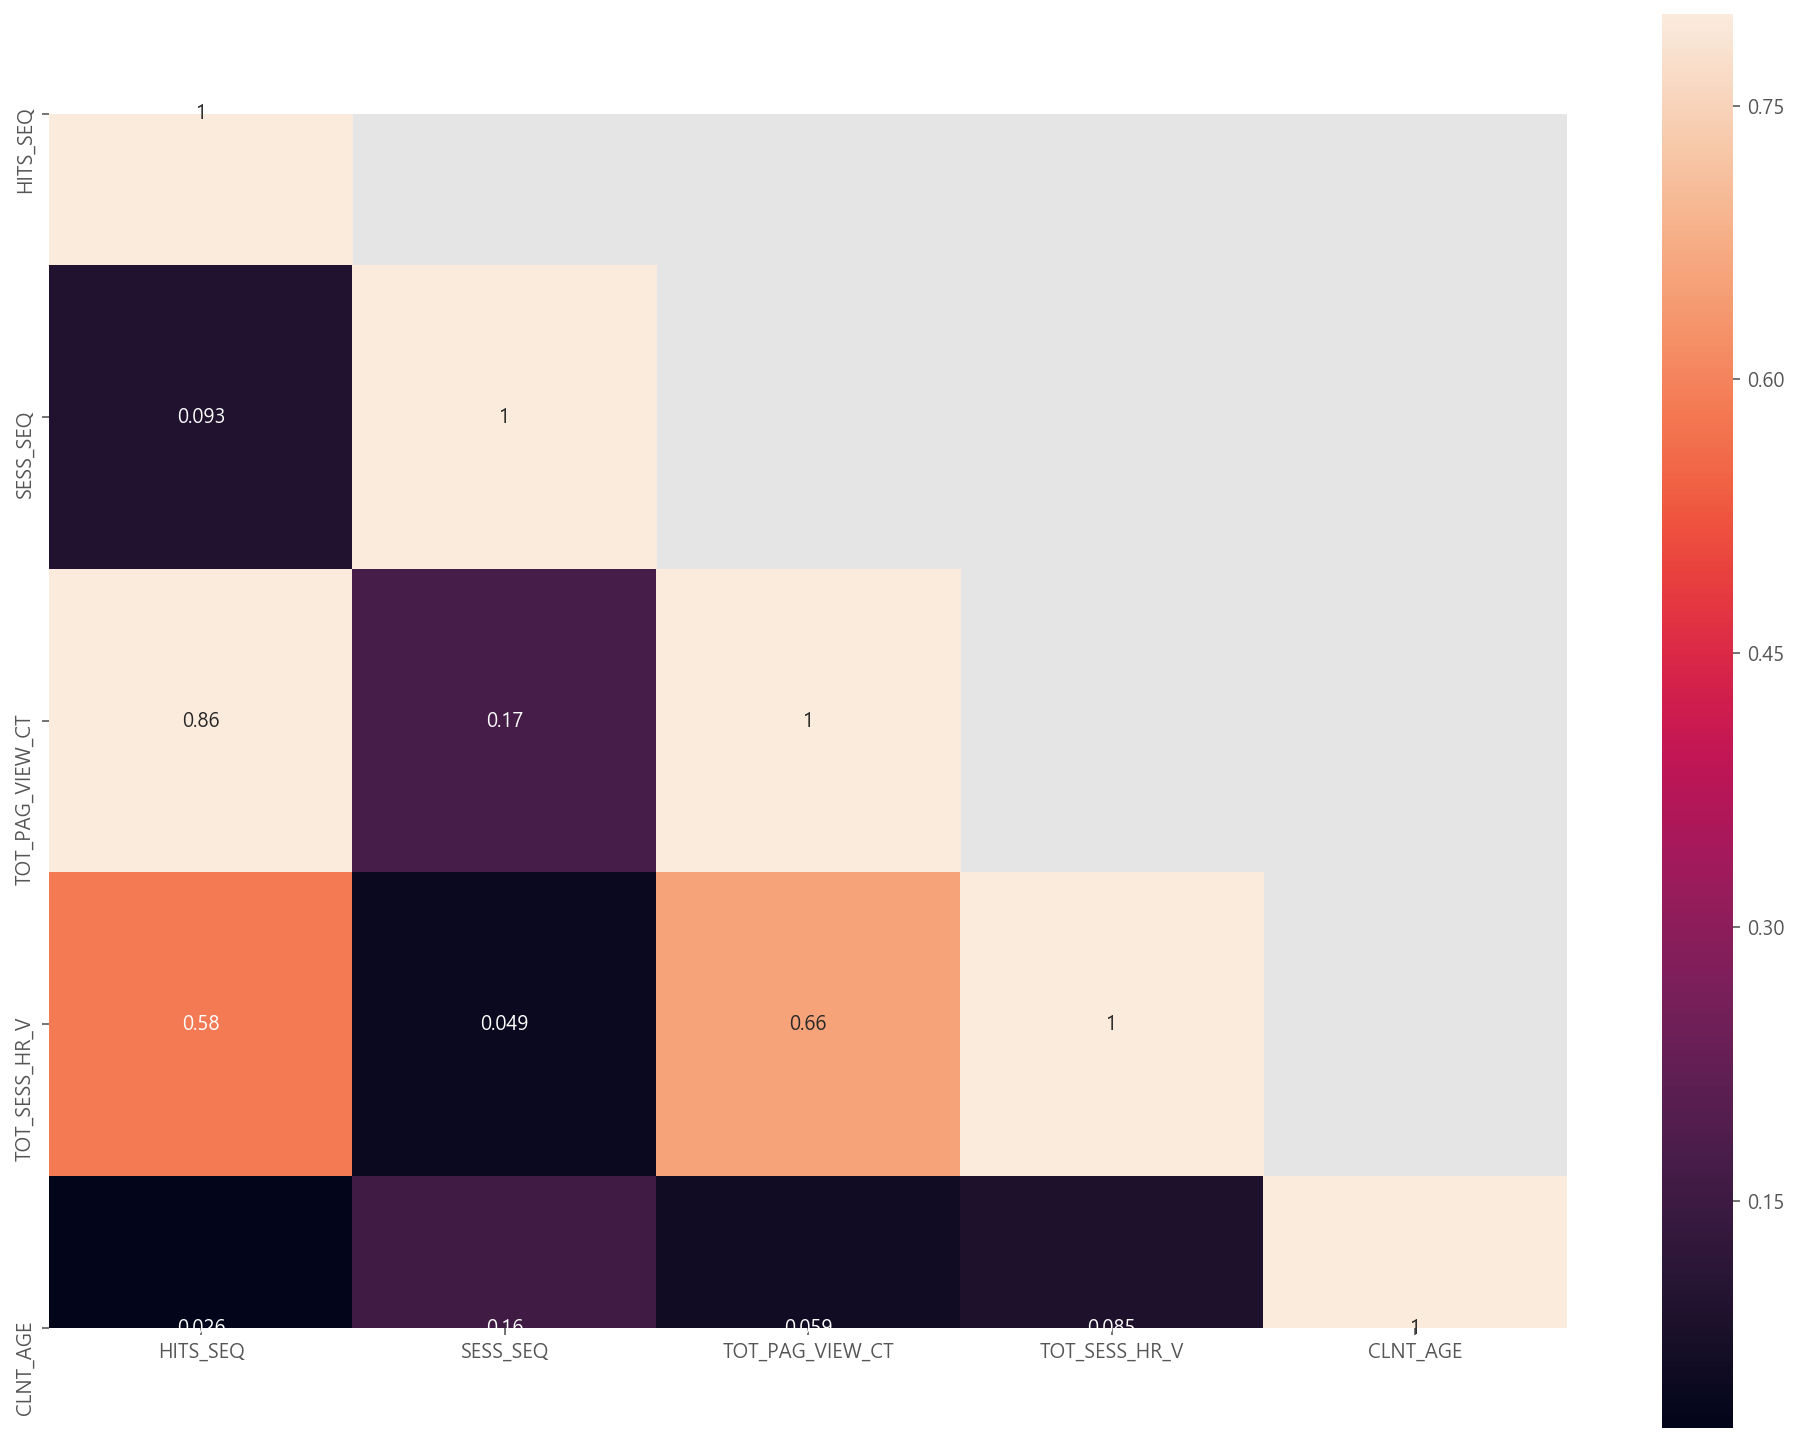

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(17,13)
sns.heatmap(corrMat,mask=mask, vmax=0.8, square=True, annot=True)

## 2. 결측치

In [26]:
pscm.isnull().sum()
# 결론 : 성별과 연령이 입력이 되지 않은 자료는 비회원자료이므로 따로 처리할 필요 없다고 생각됨.
# 이유 :
## 구매한 상품이나 검색어와 연관지어 성별을 추정할 수 있지만, 비회원 구매를 하는 사람들은 일회성 고객일 확률이 높다.
## 그렇기 때문에 이성에게 줄 선물용 일 확률도 높으므로 위험성이 크다고 생각됨.
## 게다가 성별,연령의 결측치가 총 데이터의 1/5을 차지하고 있음.

CLNT_ID                  0
SESS_ID                  0
HITS_SEQ                 0
PD_C                     0
PD_ADD_NM                0
PD_BRA_NM                0
PD_BUY_AM                0
PD_BUY_CT                0
SESS_SEQ                 0
SESS_DT                  0
TOT_PAG_VIEW_CT        435
TOT_SESS_HR_V        20320
DVC_CTG_NM               0
ZON_NM                   0
CITY_NM                  0
PD_NM                    0
CLAC1_NM                 0
CLNT_GENDER        1036319
CLNT_AGE           1036319
COUNT_DAY                0
year                     0
month                    0
day                      0
PD_BUY_TOTAL             0
dtype: int64

### 2 - 1. TOT_PAG_VIEW_CT 와  TOT_SESS_HR_V  둘다 na

In [41]:
print('결측치 개수 : ',len(pscm[(pscm['TOT_PAG_VIEW_CT'].isnull()) & (pscm['TOT_SESS_HR_V'].isnull())]))

결측치 개수 :  416


### 2 - 2. TOT_PAG_VIEW_CT만 na

In [42]:
print('결측치 개수 : ',len(pscm[(pscm['TOT_PAG_VIEW_CT'].isnull()) & (~pscm['TOT_SESS_HR_V'].isnull())]))
pscm[(pscm['TOT_PAG_VIEW_CT'].isnull()) & (~pscm['TOT_SESS_HR_V'].isnull())]['TOT_SESS_HR_V'].value_counts()


결측치 개수 :  19


1.0       8
9.0       2
2.0       2
44.0      2
18.0      2
1583.0    1
5.0       1
53.0      1
Name: TOT_SESS_HR_V, dtype: int64

### 2 - 3. TOT_SESS_HR_V만 na

In [43]:
print('결측치 개수 : ',len(pscm[(~pscm['TOT_PAG_VIEW_CT'].isnull()) & (pscm['TOT_SESS_HR_V'].isnull())]))
pscm[(~pscm['TOT_PAG_VIEW_CT'].isnull()) & (pscm['TOT_SESS_HR_V'].isnull())]['TOT_PAG_VIEW_CT'].value_counts()

결측치 개수 :  19904


1.0    19799
2.0      100
3.0        3
7.0        1
5.0        1
Name: TOT_PAG_VIEW_CT, dtype: int64

### 2- 4. 결측치 처리

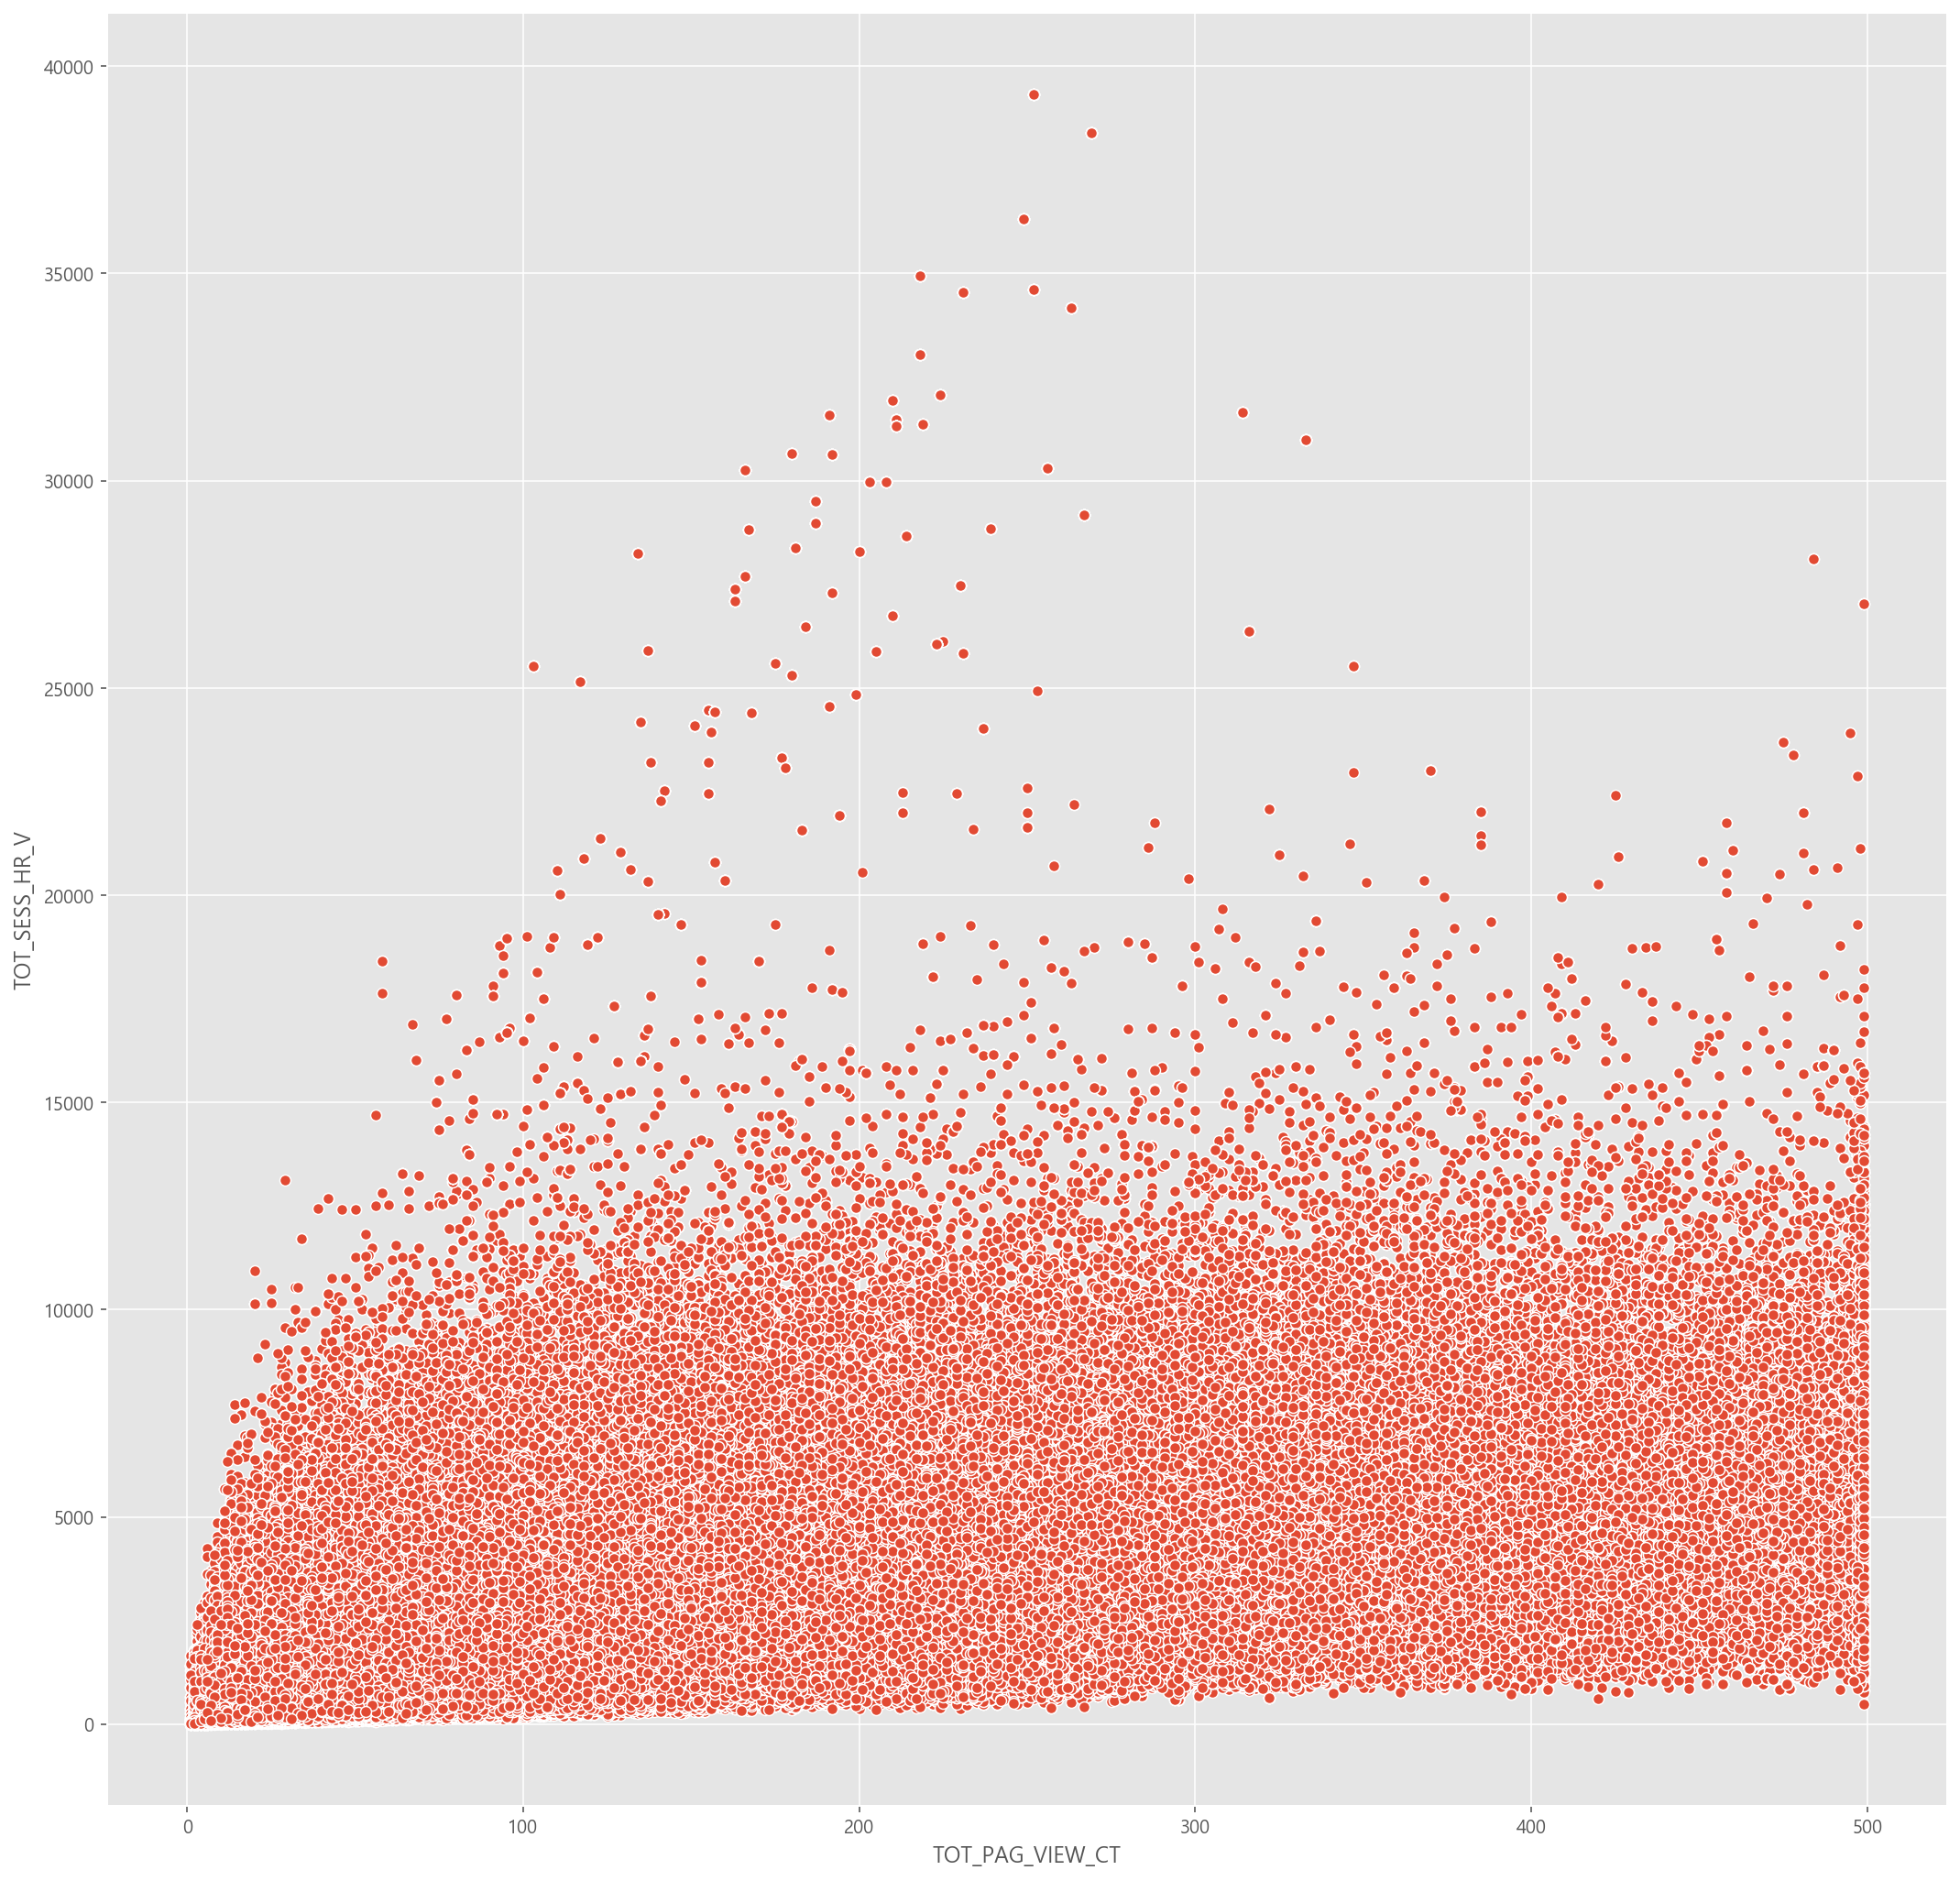

In [27]:
# TOT_SESS_HR_V를 추정하기에 너무 고르게 분포되어있고 결측치의 크기가 0.4%에 미치지 못하므로 삭제를 선택하였다.
plt.figure(figsize=[18,18])
sns.scatterplot(pscm['TOT_PAG_VIEW_CT'],pscm['TOT_SESS_HR_V'])

### 2- 4-1. 그래도 TOT_SESS_HR_V 랜덤포레스트 예측 시도.

In [67]:
# 선택할 변수
rf_val_list=['HITS_SEQ','SESS_SEQ','TOT_PAG_VIEW_CT','TOT_SESS_HR_V']

In [68]:
rf_data=pscm[rf_val_list]

In [42]:
rf_data.head()

,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,CLNT_GENDER,TOT_SESS_HR_V
0,12,1,21.0,NaN,902.0
1,28,1,21.0,NaN,902.0
2,12,1,21.0,NaN,902.0
3,28,1,21.0,NaN,902.0
4,77,528,108.0,F,738.0


In [43]:
rf_data=pd.concat([rf_data,pd.get_dummies(rf_data['CLNT_GENDER'])],sort=False,axis=1).drop('CLNT_GENDER',axis=1)
rf_data['F']=rf_data['F'].astype('int')
rf_data['M']=rf_data['M'].astype('int')
rf_data.head()

,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,F,M
0,12,1,21.0,902.0,0,0
1,28,1,21.0,902.0,0,0
2,12,1,21.0,902.0,0,0
3,28,1,21.0,902.0,0,0
4,77,528,108.0,738.0,1,0


In [73]:
# 랜덤포레스트 적용

def tot_sess_hr_v_RF(data):
    Col=['HITS_SEQ','SESS_SEQ','TOT_PAG_VIEW_CT']

    train= data[(~data['TOT_PAG_VIEW_CT'].isnull()) & (~data['TOT_SESS_HR_V'].isnull())].sample(1000000)
    target=data[(~data['TOT_PAG_VIEW_CT'].isnull()) & (data['TOT_SESS_HR_V'].isnull())]
    
    
    rf_hr_v = RandomForestClassifier()

    # train_model 데이터들의 타입을 스트링으로 바꿔준다.
    train["TOT_SESS_HR_V"] = train["TOT_SESS_HR_V"].astype("str")

    #학습
    rf_hr_v.fit(train[Col],train["TOT_SESS_HR_V"])

    #예측 후 대입
    target['TOT_SESS_HR_V']=rf_hr_v.predict(X = target[Col])

    #예측한 df와 기존 df를 합치고 인덱스 순으로 정렬
    result = pd.concat([data[(data['TOT_PAG_VIEW_CT'].isnull()) & (data['TOT_SESS_HR_V'].isnull())],
                        data[(data['TOT_PAG_VIEW_CT'].isnull()) & (~data['TOT_SESS_HR_V'].isnull())],
                        data[(~data['TOT_PAG_VIEW_CT'].isnull()) & (~data['TOT_SESS_HR_V'].isnull())],
                        target]).sort_index()

    # TOT_SESS_HR_V를 float으로 지정해 준다.
    result["TOT_SESS_HR_V"] = result["TOT_SESS_HR_V"].astype("float")

    return result

In [ ]:
result=tot_sess_hr_v_RF(rf_data) #피팅 중 메모리 에러.. (관측치를 줄일수록 손해이므로 중단)
## 표본을 줄여본 결과 5000개에서 작동을 하지만, 너무 편향되는 성향이 있어서 중단.

### 2-4-2 결측치 처리

In [34]:
# TOT_SESS_HR_V 와 TOT_PAG_VIEW_CT에 결측지가 있는 자료는 제외
pscm=pscm[~((pscm['TOT_SESS_HR_V'].isnull()) | (pscm['TOT_PAG_VIEW_CT'].isnull()))].reset_index()

In [33]:
pscm

(5004567, 24)